In [1]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import OneClassSVM
from robocop import fetch_events,build_pid_windows,evaluate_and_report,build_pid_and_handle_windows
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
NUM_SYSCALLS = 473
NGRAM = 4
NU = 0.01
GAMMA = 0.01


In [3]:
[np.arange(NUM_SYSCALLS)] * NGRAM

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [4]:

encoder = OneHotEncoder(
    categories=[np.arange(NUM_SYSCALLS)] * NGRAM,
    sparse_output=False,
)

encoder.fit(np.zeros((1, NGRAM), dtype=np.int32))


OneHotEncoder(categories=[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106...
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402,
       403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415,
       416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428,
       429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
       442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
       455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
       468, 469, 470, 471, 472])],
              sparse_output=False)

In [5]:
def extract_features(window):
    x = np.array([e["syscall_num"] for e in window],dtype=np.int32).reshape(1,-1)
    return encoder.transform(x)[0]

def build_X(ngrams):
    return np.array([extract_features(ngram) for ngram in ngrams])

In [6]:
print(extract_features([{"syscall_num":1},{"syscall_num":4},{"syscall_num":472},{"syscall_num":472}]))

[0. 1. 0. ... 0. 0. 1.]


In [7]:
# OneHotEncoding Of Ngrams
print(build_X([[{"syscall_num":1},{"syscall_num":4},{"syscall_num":472},{"syscall_num":472}],
               [{"syscall_num":2},{"syscall_num":4},{"syscall_num":2},{"syscall_num":472}]]))

[[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


In [8]:
train_events = fetch_events("test = '5'",100000)

In [9]:
build_pid_windows(train_events)

[[{'id': 1226090,
   'ts': 1768429161807872.0,
   'pid': 2920,
   'tid': 6172,
   'syscall_num': 369,
   'process_name': 'perienceHost.exe',
   'handle_operation': None,
   'handle_1_val': 18446744071562075496,
   'handle_2_val': None,
   'ret_handle': None,
   'closed_handle': None,
   'handle_1_access': 2,
   'handle_2_access': None,
   'handle_1_access_mode': 160,
   'handle_2_access_mode': None},
  {'id': 1226095,
   'ts': 1768429161807872.0,
   'pid': 2920,
   'tid': 6172,
   'syscall_num': 419,
   'process_name': 'perienceHost.exe',
   'handle_operation': None,
   'handle_1_val': 18446744071562075496,
   'handle_2_val': 18446744071562076120,
   'ret_handle': None,
   'closed_handle': None,
   'handle_1_access': 2,
   'handle_2_access': 2,
   'handle_1_access_mode': 160,
   'handle_2_access_mode': 64},
  {'id': 1226098,
   'ts': 1768429161807872.0,
   'pid': 2920,
   'tid': 6172,
   'syscall_num': 369,
   'process_name': 'perienceHost.exe',
   'handle_operation': None,
   'handle_

In [10]:
extract_features(train_events[0:4])

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
train_events = fetch_events("test = '1' OR test = '2' OR test='15' OR test='14'",100_000)

In [12]:
len(train_events)

100000

In [13]:
train_windows = build_pid_windows(train_events)
X_train = build_X(train_windows)

In [14]:
X_train.shape

(24970, 1892)

In [15]:
def show_pca_as_graph(X):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    plt.figure()
    plt.scatter(X_2d[:, 0], X_2d[:, 1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("X_train projected to 2D using PCA")
    plt.show()

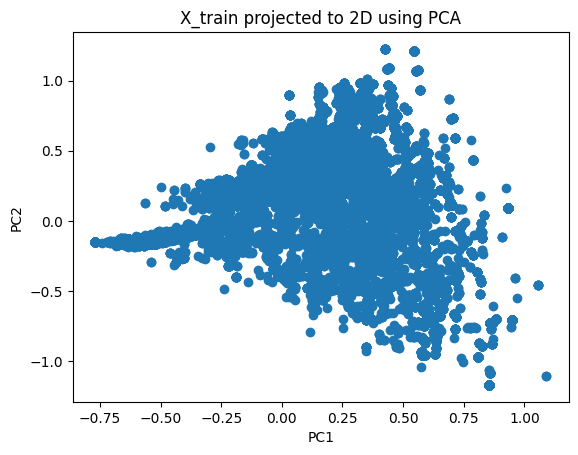

In [26]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_train)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("X_train projected to 2D using PCA")
plt.show()

In [17]:
virus_events = fetch_events("test = '10'",100_000)
virus_windows = build_pid_windows(virus_events)
X_virus = build_X(virus_windows)

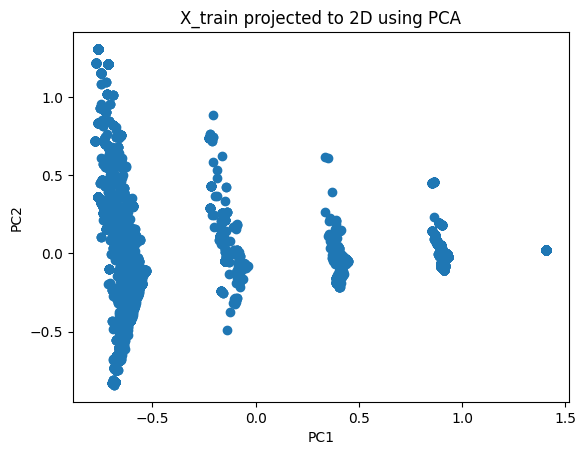

In [27]:
X_2d = pca.fit_transform(X_virus)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("X_train projected to 2D using PCA")
plt.show()

In [19]:
normal_events = fetch_events("test = '16'",10_000)
normal_windows = build_pid_windows(normal_events)
X_normal = build_X(normal_windows)

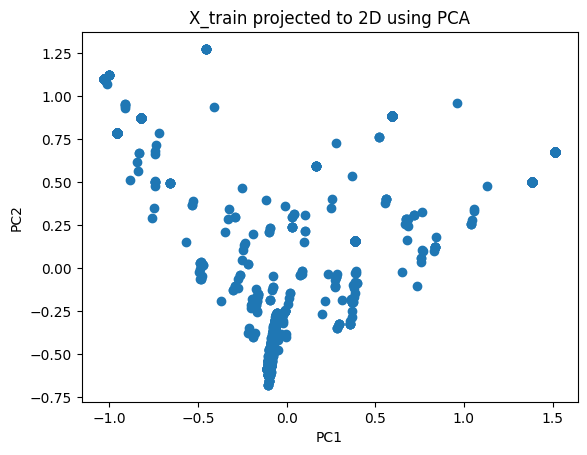

In [28]:
X_2d = pca.fit_transform(X_normal)

plt.figure()
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("X_train projected to 2D using PCA")
plt.show()

In [21]:

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)

model = OneClassSVM(kernel="rbf", nu=NU, gamma=0.01)
model.fit(X_train_scaled)

print("[✓] Model trained")


[✓] Model trained


In [22]:

normal_report = evaluate_and_report(
    label="NORMAL",
    windows=normal_windows,
    X=X_normal,
    model=model,
    scaler=scaler
)

virus_report = evaluate_and_report(
    label="VIRUS",
    windows=virus_windows,
    X=X_virus,
    model=model,
    scaler=scaler
)

print("NORMAL:", normal_report)
print("VIRUS:", virus_report)


===== REPORT: NORMAL =====

===== GLOBAL SEVERITY REPORT =====
   LOW: 135
MEDIUM: 396
  HIGH: 0
Total anomalies: 531

===== PER-PID SUMMARY =====
PID 8204: {'MEDIUM': 321}
PID 4056: {'LOW': 52, 'MEDIUM': 9}
PID 5424: {'MEDIUM': 24, 'LOW': 14}
PID 2920: {'LOW': 15, 'MEDIUM': 6}
PID 7300: {'LOW': 16, 'MEDIUM': 1}
PID 2740: {'MEDIUM': 8, 'LOW': 7}
PID 7952: {'MEDIUM': 6, 'LOW': 3}
PID 3560: {'MEDIUM': 4, 'LOW': 4}
PID 1000: {'MEDIUM': 2, 'LOW': 4}
PID 4456: {'LOW': 2, 'MEDIUM': 4}
PID 1900: {'LOW': 4}
PID 1092: {'LOW': 2, 'MEDIUM': 1}
PID 1644: {'MEDIUM': 3}
PID 2820: {'LOW': 2}
PID 9028: {'LOW': 2}
PID 1580: {'MEDIUM': 2}
PID 6064: {'MEDIUM': 1, 'LOW': 1}
PID 9124: {'MEDIUM': 1, 'LOW': 1}
PID 2632: {'LOW': 2}
PID 2044: {'LOW': 1}
PID 6396: {'MEDIUM': 1}
PID 5472: {'LOW': 1}
PID 6300: {'MEDIUM': 1}
PID 3236: {'LOW': 1}
PID 1516: {'LOW': 1}
PID 2180: {'MEDIUM': 1}

===== ALERT LOGIC (HIGH & non-monotonic only) =====
HIGH non-monotonic anomalies: 0
✅ No strong alert triggered by rule

===

In [23]:
len(train_events)

100000

In [24]:
virus_events = fetch_events("test = '5'",100_000)
virus_windows = build_pid_windows(virus_events)
X_virus = build_X(virus_windows)
virus_report = evaluate_and_report(
    label="VIRUS",
    windows=virus_windows,
    X=X_virus,
    model=model,
    scaler=scaler
)

virus_report



===== REPORT: VIRUS =====

===== GLOBAL SEVERITY REPORT =====
   LOW: 1337
MEDIUM: 2155
  HIGH: 0
Total anomalies: 3492

===== PER-PID SUMMARY =====
PID 4612: {'LOW': 632, 'MEDIUM': 919}
PID 1104: {'MEDIUM': 750, 'LOW': 383}
PID 3560: {'LOW': 36, 'MEDIUM': 85}
PID 7720: {'LOW': 45, 'MEDIUM': 71}
PID 4476: {'MEDIUM': 30, 'LOW': 65}
PID 1000: {'LOW': 13, 'MEDIUM': 78}
PID 2920: {'LOW': 25, 'MEDIUM': 53}
PID 3980: {'MEDIUM': 31, 'LOW': 36}
PID 1596: {'LOW': 23, 'MEDIUM': 43}
PID 1832: {'LOW': 21, 'MEDIUM': 36}
PID 3212: {'MEDIUM': 22, 'LOW': 16}
PID 1092: {'LOW': 8, 'MEDIUM': 4}
PID 3384: {'LOW': 9, 'MEDIUM': 2}
PID 7300: {'LOW': 7, 'MEDIUM': 4}
PID 796: {'MEDIUM': 7, 'LOW': 2}
PID 4: {'MEDIUM': 6}
PID 3412: {'LOW': 5}
PID 2180: {'LOW': 2, 'MEDIUM': 2}
PID 1684: {'MEDIUM': 3, 'LOW': 1}
PID 2544: {'LOW': 2, 'MEDIUM': 1}
PID 4088: {'MEDIUM': 3}
PID 1816: {'LOW': 2}
PID 6796: {'MEDIUM': 2}
PID 0: {'LOW': 1}
PID 6264: {'MEDIUM': 1}
PID 2820: {'LOW': 1}
PID 4656: {'LOW': 1}
PID 3748: {'MEDIUM

{'severity_buckets': {'LOW': [{'pid': 2920,
    'name': 'perienceHost.exe',
    'score': -0.11749645758657477,
    'syscalls': ['NtReleaseWorkerFactoryWorker',
     'NtSetIoCompletion',
     'NtReleaseWorkerFactoryWorker',
     'NtReleaseWorkerFactoryWorker']},
   {'pid': 3560,
    'name': 'enguestagent.exe',
    'score': -0.11615278715325145,
    'syscalls': ['NtQuerySystemInformation',
     'NtWaitForSingleObject',
     'NtQuerySystemInformation',
     'NtClose']},
   {'pid': 3980,
    'name': 'tem32\\sihost.exe',
    'score': -0.11947208471297845,
    'syscalls': ['NtReleaseWorkerFactoryWorker',
     'NtReleaseWorkerFactoryWorker',
     'NtAssociateWaitCompletionPacket',
     'NtClearEvent']},
   {'pid': 3980,
    'name': 'tem32\\sihost.exe',
    'score': -0.11433713957653587,
    'syscalls': ['NtReleaseWorkerFactoryWorker',
     'NtSetIoCompletion',
     'NtReleaseWorkerFactoryWorker',
     'NtAssociateWaitCompletionPacket']},
   {'pid': 4612,
    'name': '0\\powershell.exe',
    '

In [25]:
virus_report

{'severity_buckets': {'LOW': [{'pid': 2920,
    'name': 'perienceHost.exe',
    'score': -0.11749645758657477,
    'syscalls': ['NtReleaseWorkerFactoryWorker',
     'NtSetIoCompletion',
     'NtReleaseWorkerFactoryWorker',
     'NtReleaseWorkerFactoryWorker']},
   {'pid': 3560,
    'name': 'enguestagent.exe',
    'score': -0.11615278715325145,
    'syscalls': ['NtQuerySystemInformation',
     'NtWaitForSingleObject',
     'NtQuerySystemInformation',
     'NtClose']},
   {'pid': 3980,
    'name': 'tem32\\sihost.exe',
    'score': -0.11947208471297845,
    'syscalls': ['NtReleaseWorkerFactoryWorker',
     'NtReleaseWorkerFactoryWorker',
     'NtAssociateWaitCompletionPacket',
     'NtClearEvent']},
   {'pid': 3980,
    'name': 'tem32\\sihost.exe',
    'score': -0.11433713957653587,
    'syscalls': ['NtReleaseWorkerFactoryWorker',
     'NtSetIoCompletion',
     'NtReleaseWorkerFactoryWorker',
     'NtAssociateWaitCompletionPacket']},
   {'pid': 4612,
    'name': '0\\powershell.exe',
    '